In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Timestamp
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("C:/Users/Biggest/Downloads/HotelDataset.xlsx")

In [3]:
data

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,...,Check-Out Date,Rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Booking Price[SGD],Discount,GST,Profit Margin
0,DDMY00001,2010-01-01,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,...,2010-01-20,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,0.01,0.07,0.25
1,DDID00002,2010-01-01,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,...,2010-01-22,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0.00,0.07,0.24
2,DDSG00003,2010-01-01,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,...,2010-01-09,2,Seacoast Hotel,4.5,Credit Card,Grab,338,0.19,0.07,0.20
3,DDSG00004,2010-01-01,13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,...,2010-02-19,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,0.19,0.07,0.13
4,DDKH00005,2010-01-01,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,...,2010-01-06,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,0.15,0.07,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66536,DDSG66531,2019-12-31,23:36:16,SG12034,Female,42,Singapore,Central,Orchard,Germany,...,2020-01-10,2,Silver Cloud Inn,4.3,Wallet,Grab,182,0.23,0.07,0.24
66537,DDSG66532,2019-12-31,14:41:01,SG12035,Female,54,Singapore,Central,Geylang,Israel,...,2020-04-13,2,The Elet,4.2,COD,DBS Paylah,125,0.06,0.07,0.19
66538,DDSG66533,2019-12-31,19:11:16,SG12036,Female,57,Singapore,Central,Downtown Core,Canada,...,2020-01-10,4,The Elet,4.4,Debit Card,EZ-Link,318,0.02,0.07,0.22
66539,DDTH66534,2019-12-31,05:12:29,TH12170,Female,44,Thailand,Surat Thani,Ko Samui,Maldives,...,2020-01-02,2,Sunset Lodge,4.2,Debit Card,HSBC,173,0.14,0.07,0.25


In [4]:
data.columns

Index(['Booking ID', 'Date of Booking', 'Time', 'Customer ID', 'Gender', 'Age',
       'Origin Country', 'State', 'Location', 'Destination Country',
       'Destination City', 'No. Of People', 'Check-in date', 'No of Days',
       'Check-Out Date', 'Rooms', 'Hotel Name', 'Hotel Rating', 'Payment Mode',
       'Bank Name', 'Booking Price[SGD]', 'Discount', 'GST', 'Profit Margin'],
      dtype='object')

In [5]:
data.nunique()

Booking ID             66536
Date of Booking         3652
Time                   39308
Customer ID            66536
Gender                     2
Age                       41
Origin Country             7
State                    219
Location                 228
Destination Country       20
Destination City         120
No. Of People              7
Check-in date           3747
No of Days                 0
Check-Out Date          3748
Rooms                      4
Hotel Name               614
Hotel Rating              11
Payment Mode               5
Bank Name                  9
Booking Price[SGD]       491
Discount                  26
GST                        1
Profit Margin             17
dtype: int64

#
Since there's no null values(Empty cells) in our needed colunms, we proceed to data cleaning dropping the unnessaary colunm

# DATA CLEANING/DATA REDUCTION  
 - We need to remove the colunms that wont be needed in our analysis to help visualize important datas clearly

In [6]:
data = data.drop([ 'Booking ID', 'Bank Name', 'Customer ID', 'GST', 'No of Days'], axis = 1)

# Feature Engineering:Creating features

In [7]:
data.columns = data.columns.str.replace(' ', '_') # Replacing the space(s) in the colunm names with underscore(_)
data

,Date_of_Booking,Time,Gender,Age,Origin_Country,State,Location,Destination_Country,Destination_City,No._Of_People,Check-in_date,Check-Out_Date,Rooms,Hotel_Name,Hotel_Rating,Payment_Mode,Booking_Price[SGD],Discount,Profit_Margin
0,2010-01-01,10:49:40,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,Horsens,1,2010-01-12,2010-01-20,1,Hotel Triton,4.3,Wallet,243,0.01,0.25
1,2010-01-01,09:19:47,Female,44,Indonesia,Ciawi,West Java,Colombia,Medellin,3,2010-01-21,2010-01-22,2,Enchanted Isle,4.2,Wallet,312,0.00,0.24
2,2010-01-01,11:52:56,Female,31,Singapore,Central,Rochor,Germany,Munich,3,2010-01-02,2010-01-09,2,Seacoast Hotel,4.5,Credit Card,338,0.19,0.20
3,2010-01-01,13:44:40,Male,28,Singapore,North,Yishun,Canada,Montreal,3,2010-02-15,2010-02-19,2,Night In Paradise,4.2,Debit Card,254,0.19,0.13
4,2010-01-01,05:38:26,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,Nairobi,5,2010-01-03,2010-01-06,3,Tiny Digs Hotel,4.6,Wallet,313,0.15,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66536,2019-12-31,23:36:16,Female,42,Singapore,Central,Orchard,Germany,Berlin,4,2020-01-06,2020-01-10,2,Silver Cloud Inn,4.3,Wallet,182,0.23,0.24
66537,2019-12-31,14:41:01,Female,54,Singapore,Central,Geylang,Israel,Holon,4,2020-04-09,2020-04-13,2,The Elet,4.2,COD,125,0.06,0.19
66538,2019-12-31,19:11:16,Female,57,Singapore,Central,Downtown Core,Canada,Ottawa,7,2020-01-09,2020-01-10,4,The Elet,4.4,Debit Card,318,0.02,0.22
66539,2019-12-31,05:12:29,Female,44,Thailand,Surat Thani,Ko Samui,Maldives,Viligili,3,2020-01-01,2020-01-02,2,Sunset Lodge,4.2,Debit Card,173,0.14,0.25


from the data, there's no data/colunm for lead time, which might be needed in our analysis.
* we can create lead time and Number of days from available colunm( Date of booking, check in date and checkIn date) in the given dataset.
 - LeadTime; time between the booking date and checking date
 - No_of_day; Number of days spent in the hotel by the customer

In [8]:
# Convert date columns to datetime objects
data['Check-Out_Date'] = pd.to_datetime(data['Check-Out_Date'])
data['Check-in_date'] = pd.to_datetime(data['Check-in_date'])

# Create number of days spent column by subtracting booking date from checkin date
data['No_of_Days'] = data['Check-Out_Date'] - data['Check-in_date']

# Convert date columns to datetime objects
data['Date_of_Booking'] = pd.to_datetime(data['Date_of_Booking'])
data['Check-in_date'] = pd.to_datetime(data['Check-in_date'])

# Create lead time column by subtracting booking date from checkin date
data['LeadTime'] = data['Check-in_date'] - data['Date_of_Booking']


#print new data

data.head()


#print new data

data.head()


,Date_of_Booking,Time,Gender,Age,Origin_Country,State,Location,Destination_Country,Destination_City,No._Of_People,...,Check-Out_Date,Rooms,Hotel_Name,Hotel_Rating,Payment_Mode,Booking_Price[SGD],Discount,Profit_Margin,No_of_Days,LeadTime
0,2010-01-01,10:49:40,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,Horsens,1,...,2010-01-20,1,Hotel Triton,4.3,Wallet,243,0.01,0.25,8 days,11 days
1,2010-01-01,09:19:47,Female,44,Indonesia,Ciawi,West Java,Colombia,Medellin,3,...,2010-01-22,2,Enchanted Isle,4.2,Wallet,312,0.00,0.24,1 days,20 days
2,2010-01-01,11:52:56,Female,31,Singapore,Central,Rochor,Germany,Munich,3,...,2010-01-09,2,Seacoast Hotel,4.5,Credit Card,338,0.19,0.20,7 days,1 days
3,2010-01-01,13:44:40,Male,28,Singapore,North,Yishun,Canada,Montreal,3,...,2010-02-19,2,Night In Paradise,4.2,Debit Card,254,0.19,0.13,4 days,45 days
4,2010-01-01,05:38:26,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,Nairobi,5,...,2010-01-06,3,Tiny Digs Hotel,4.6,Wallet,313,0.15,0.17,3 days,2 days


#
to cearfully analyze our data by booking day, month and year, we split the date of booking date, month and year.
we also need to round up our time for a better booking time analysis.

In [9]:
#Converting a timestamp colunm into string so we can extract 'Year as BookingYear', 'BookingMonth as Month', 'Date as BookingDay'

df=data['Date_of_Booking'].astype(str)

#extract Year, Month, Date

data['BookingYear'] = df.apply(lambda x: x.split("-")[0])
data['BookingMonth'] = df.apply(lambda x: x.split("-")[1])
data['BookingDay'] = df.apply(lambda x: x.split("-")[2])




#print our new data
data

,Date_of_Booking,Time,Gender,Age,Origin_Country,State,Location,Destination_Country,Destination_City,No._Of_People,...,Hotel_Rating,Payment_Mode,Booking_Price[SGD],Discount,Profit_Margin,No_of_Days,LeadTime,BookingYear,BookingMonth,BookingDay
0,2010-01-01,10:49:40,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,Horsens,1,...,4.3,Wallet,243,0.01,0.25,8 days,11 days,2010,01,01
1,2010-01-01,09:19:47,Female,44,Indonesia,Ciawi,West Java,Colombia,Medellin,3,...,4.2,Wallet,312,0.00,0.24,1 days,20 days,2010,01,01
2,2010-01-01,11:52:56,Female,31,Singapore,Central,Rochor,Germany,Munich,3,...,4.5,Credit Card,338,0.19,0.20,7 days,1 days,2010,01,01
3,2010-01-01,13:44:40,Male,28,Singapore,North,Yishun,Canada,Montreal,3,...,4.2,Debit Card,254,0.19,0.13,4 days,45 days,2010,01,01
4,2010-01-01,05:38:26,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,Nairobi,5,...,4.6,Wallet,313,0.15,0.17,3 days,2 days,2010,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66536,2019-12-31,23:36:16,Female,42,Singapore,Central,Orchard,Germany,Berlin,4,...,4.3,Wallet,182,0.23,0.24,4 days,6 days,2019,12,31
66537,2019-12-31,14:41:01,Female,54,Singapore,Central,Geylang,Israel,Holon,4,...,4.2,COD,125,0.06,0.19,4 days,100 days,2019,12,31
66538,2019-12-31,19:11:16,Female,57,Singapore,Central,Downtown Core,Canada,Ottawa,7,...,4.4,Debit Card,318,0.02,0.22,1 days,9 days,2019,12,31
66539,2019-12-31,05:12:29,Female,44,Thailand,Surat Thani,Ko Samui,Maldives,Viligili,3,...,4.2,Debit Card,173,0.14,0.25,1 days,1 days,2019,12,31


#
since we have the booking date splited, we can hearby drop the booking date colunm and every other colunm thats not needed for better visualization of dataframe.

In [10]:
data.drop(['Date_of_Booking', 'Check-in_date', 'Check-Out_Date', 'State', 'No._Of_People', 'Location'], inplace=True, axis = 1)
data

,Time,Gender,Age,Origin_Country,Destination_Country,Destination_City,Rooms,Hotel_Name,Hotel_Rating,Payment_Mode,Booking_Price[SGD],Discount,Profit_Margin,No_of_Days,LeadTime,BookingYear,BookingMonth,BookingDay
0,10:49:40,Male,42,Malaysia,Denmark,Horsens,1,Hotel Triton,4.3,Wallet,243,0.01,0.25,8 days,11 days,2010,01,01
1,09:19:47,Female,44,Indonesia,Colombia,Medellin,2,Enchanted Isle,4.2,Wallet,312,0.00,0.24,1 days,20 days,2010,01,01
2,11:52:56,Female,31,Singapore,Germany,Munich,2,Seacoast Hotel,4.5,Credit Card,338,0.19,0.20,7 days,1 days,2010,01,01
3,13:44:40,Male,28,Singapore,Canada,Montreal,2,Night In Paradise,4.2,Debit Card,254,0.19,0.13,4 days,45 days,2010,01,01
4,05:38:26,Male,44,Cambodia,Kenya,Nairobi,3,Tiny Digs Hotel,4.6,Wallet,313,0.15,0.17,3 days,2 days,2010,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66536,23:36:16,Female,42,Singapore,Germany,Berlin,2,Silver Cloud Inn,4.3,Wallet,182,0.23,0.24,4 days,6 days,2019,12,31
66537,14:41:01,Female,54,Singapore,Israel,Holon,2,The Elet,4.2,COD,125,0.06,0.19,4 days,100 days,2019,12,31
66538,19:11:16,Female,57,Singapore,Canada,Ottawa,4,The Elet,4.4,Debit Card,318,0.02,0.22,1 days,9 days,2019,12,31
66539,05:12:29,Female,44,Thailand,Maldives,Viligili,2,Sunset Lodge,4.2,Debit Card,173,0.14,0.25,1 days,1 days,2019,12,31


# EXPLORATORY DATA ANALYSIS [EDA]

In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,66541,39308,09:48:22,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,66541,2,Female,33388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,66541.0,NaN,NaN,NaN,38.436182,11.557562,-5.0,28.0,38.0,48.0,58.0
Origin_Country,66541,7,Thailand,12170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination_Country,66541,20,New Zealand,3448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination_City,66541,120,Hamilton,1084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,66541.0,NaN,NaN,NaN,2.283344,1.031134,1.0,1.0,2.0,3.0,4.0
Hotel_Name,66541,614,Grand Hyatt,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hotel_Rating,66541.0,NaN,NaN,NaN,4.2885,0.275516,3.3,4.2,4.3,4.5,4.7
Payment_Mode,66541,5,Internet Banking,13446,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# observations
 * The booking website has more of female users than male users, with 235 diffrence between them.
 * 50% of the customers are of the age of 5 to 38 years old.
 * The booking website gets traffic by 09:48:22, we can hereby conclude that the website is most visited from 9:30am till 10am.
 * The website have more booking on the 25th of December than any other day.
 * There are bookers from Thailand than any other country, while bookers visits New Zealand more.
 * User prefers Internet Banking as payment network.
 * Grand Hyatt is the most visited hotel on the hotel list
 * More bookings where made in 2019 than any other year.
 

#
Before we continue EDA, lets separate Numerical and categorical variables for easy analysis

In [12]:
# separating Numerical and categorical variables for easy analysis

cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Time', 'Gender', 'Origin_Country', 'Destination_Country',
       'Destination_City', 'Hotel_Name', 'Payment_Mode', 'BookingYear',
       'BookingMonth', 'BookingDay'],
      dtype='object')
Numerical Variables:
['Age', 'Rooms', 'Hotel_Rating', 'Booking_Price[SGD]', 'Discount', 'Profit_Margin', 'No_of_Days', 'LeadTime']


# EDA Univariate Analysis

Age
Skew : 0.01


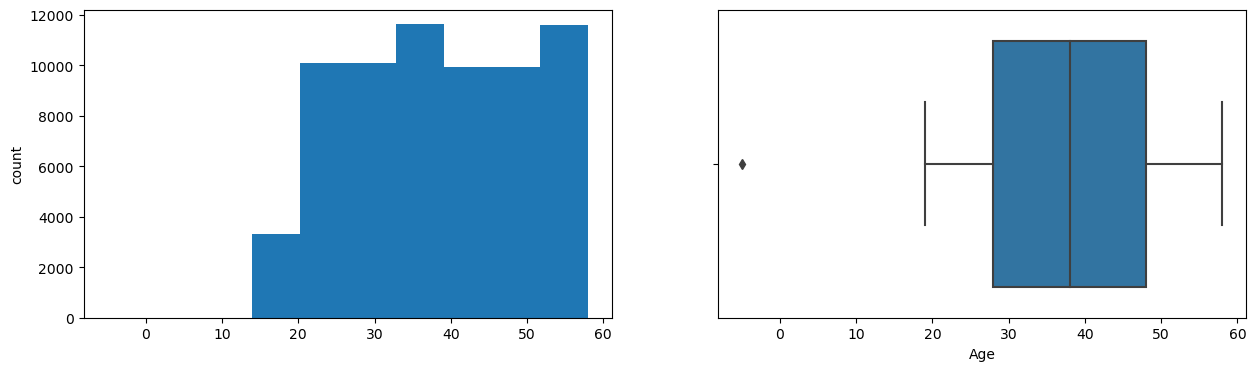

Rooms
Skew : 0.2


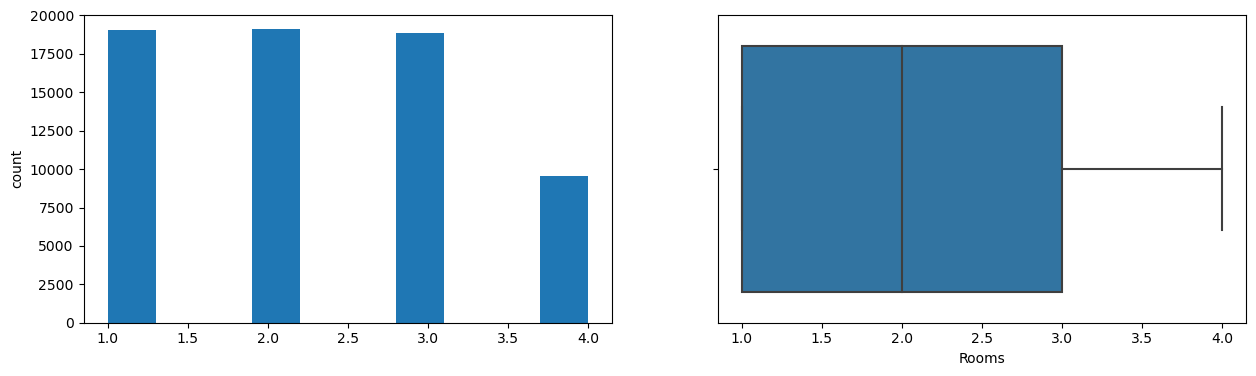

Hotel_Rating
Skew : -1.17


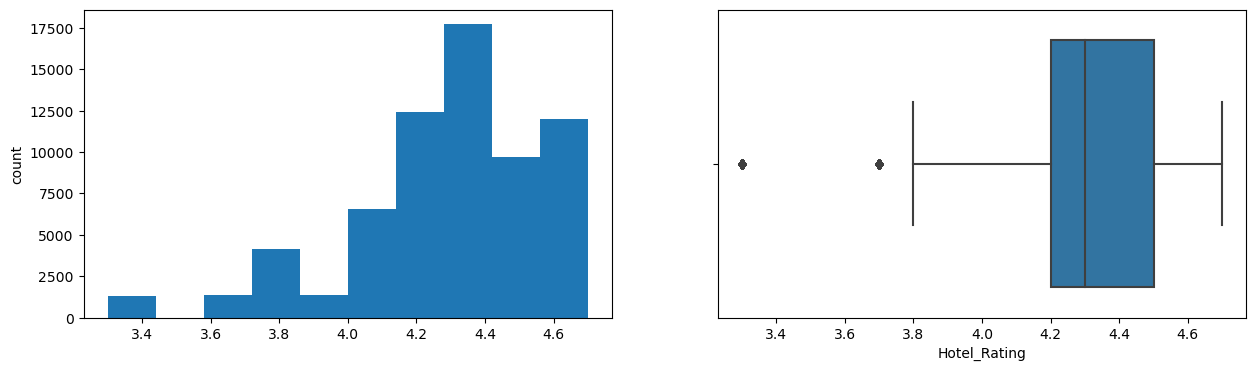

Booking_Price[SGD]
Skew : 0.39


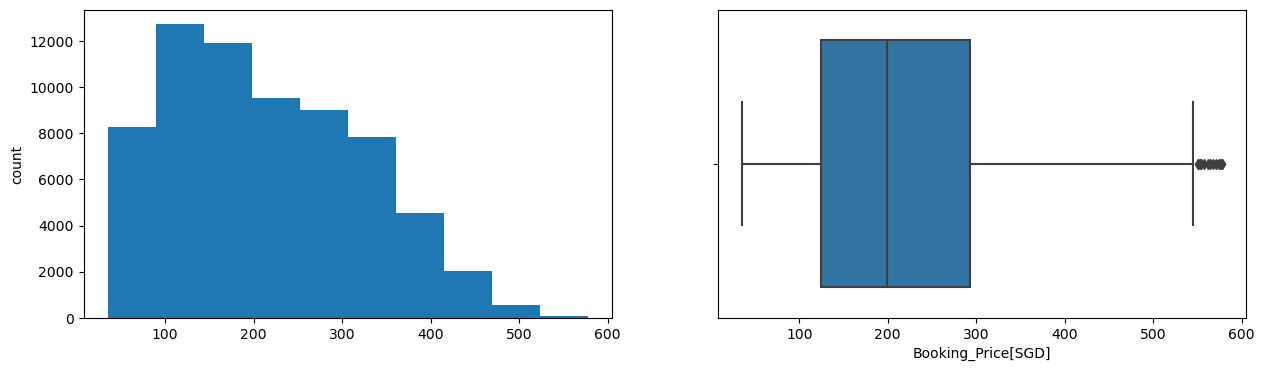

Discount
Skew : -0.01


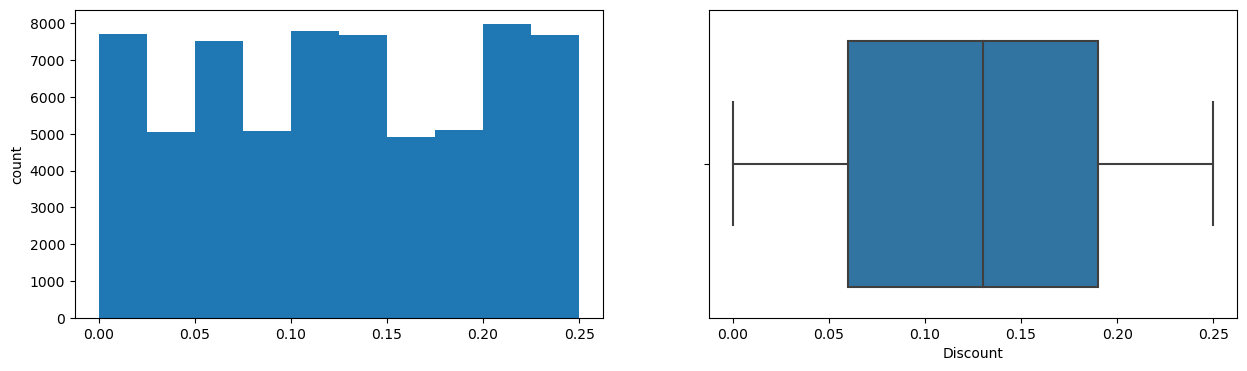

Profit_Margin
Skew : 0.08


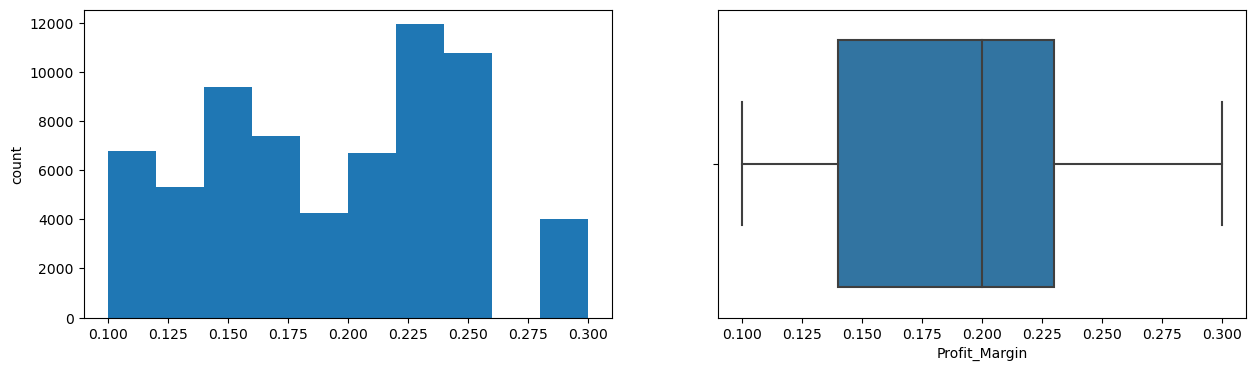

No_of_Days


TypeError: 'TimedeltaArray' with dtype timedelta64[ns] does not support reduction 'skew'

In [13]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

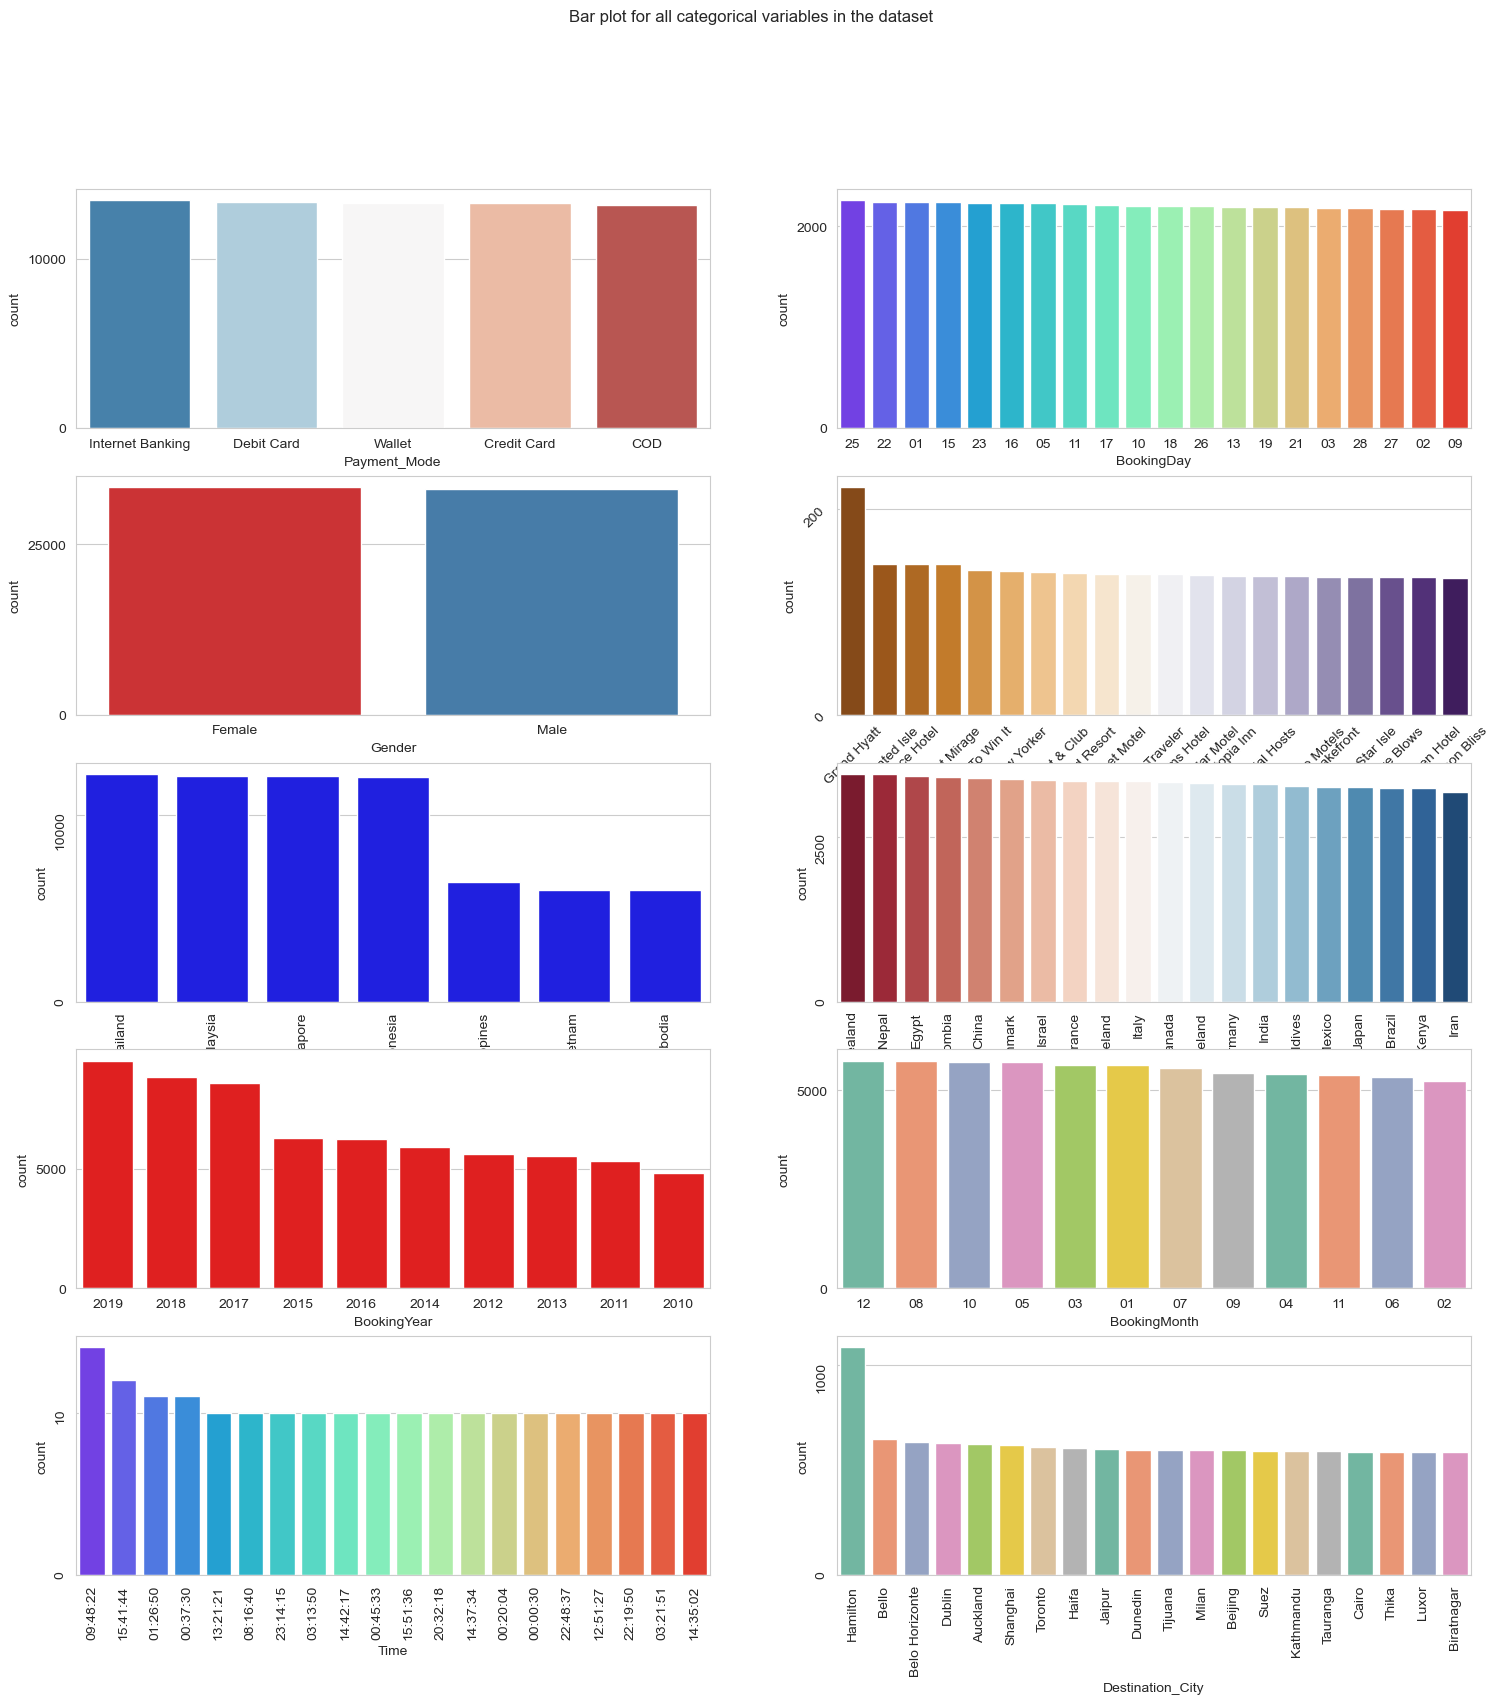

In [15]:
fig, axes = plt.subplots(5, 2, figsize = (18, 18))
sns.set_style('whitegrid')
fig.suptitle('Bar plot for all categorical variables in the dataset')

ax = sns.countplot(ax = axes[0, 0], x = 'Payment_Mode', data = data, palette = 'RdBu_r', 
              order = data['Payment_Mode'].value_counts().head(20).index);
ax = sns.countplot(ax = axes[0, 1], x = 'BookingDay', data = data, palette = 'rainbow',
             order = data['BookingDay'].value_counts().head(20).index);
ax = sns.countplot(ax = axes[1, 0], x = 'Gender', data = data, palette="Set1",
             order = data['Gender'].value_counts().head(20).index);
ax = sns.countplot(ax = axes[1, 1], x = 'Hotel_Name', data = data, palette="PuOr", 
              order = data['Hotel_Name'].value_counts().head(20).index);
ax = sns.countplot(ax = axes[2, 0], x = 'Origin_Country', data = data, color = 'blue',
             order = data['Origin_Country'].value_counts().head(20).index);
ax =sns.countplot(ax = axes[2, 1], x = 'Destination_Country', data = data, palette="RdBu",
             order = data['Destination_Country'].value_counts().head(20).index);
ax =sns.countplot(ax = axes[3, 0], x = 'BookingYear', data = data, color = 'red', 
              order = data['BookingYear'].value_counts().head(20).index);
ax =sns.countplot(ax = axes[3, 1], x = 'BookingMonth', data = data, palette="Set2",
             order = data['BookingMonth'].value_counts().head(20).index);
ax = sns.countplot(ax = axes[4, 0], x = 'Time', data = data, palette = 'rainbow', 
              order = data['Time'].value_counts().head(20).index);
ax = sns.countplot(ax = axes[4, 1], x = 'Destination_City', data = data, palette="Set2",
             order = data['Destination_City'].value_counts().head(20).index);

axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);
axes[4][0].tick_params(labelrotation=90);
axes[4][1].tick_params(labelrotation=90)
plt.rc('font', size=8)
plt.rc('axes', titlesize=100)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=80)
plt.rc('ytick', labelsize=80)
plt.rc('legend', fontsize=80)
plt.rc('figure', titlesize=100)


# EDA - Bivariate Analysis

Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

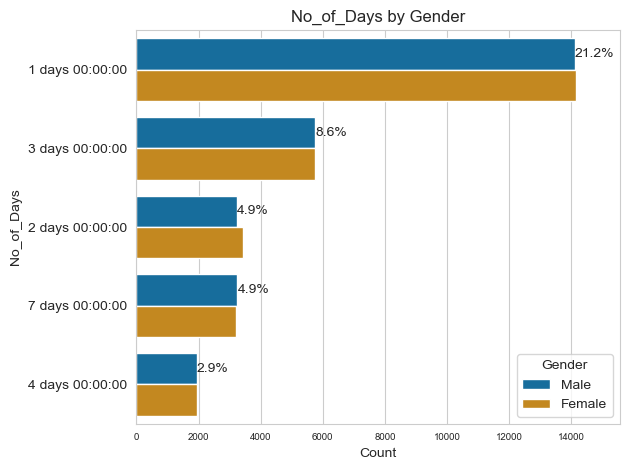

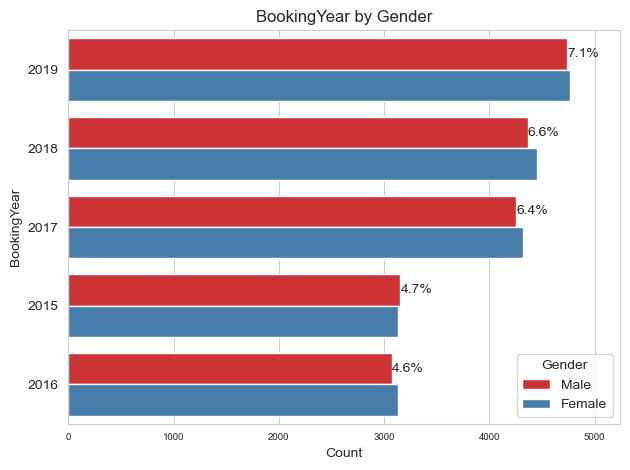

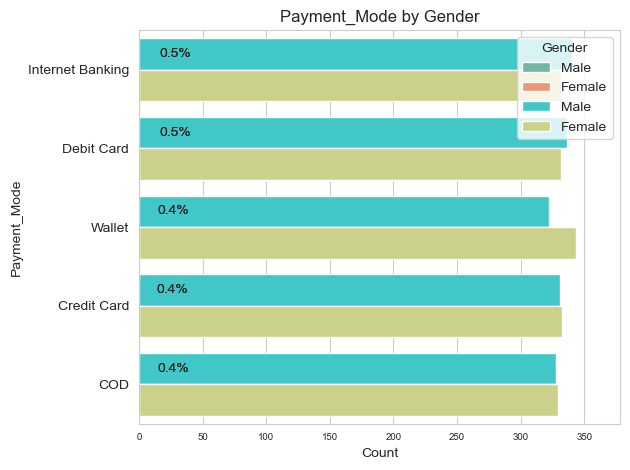

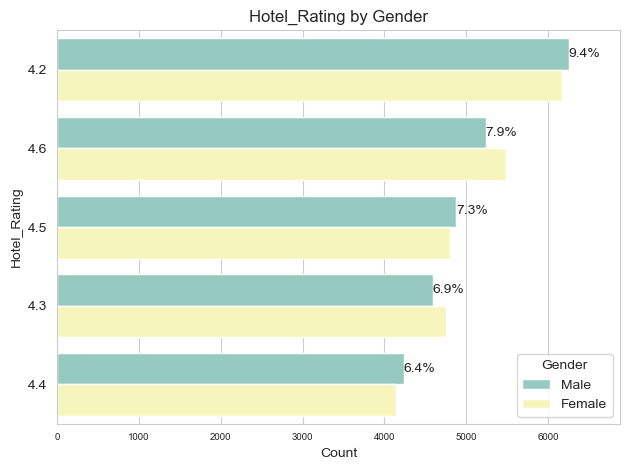

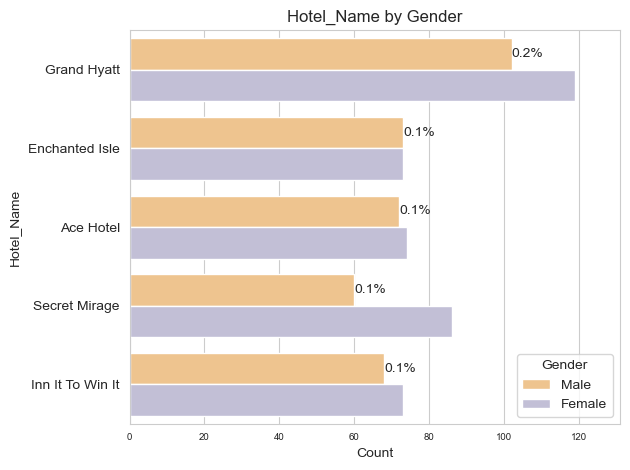

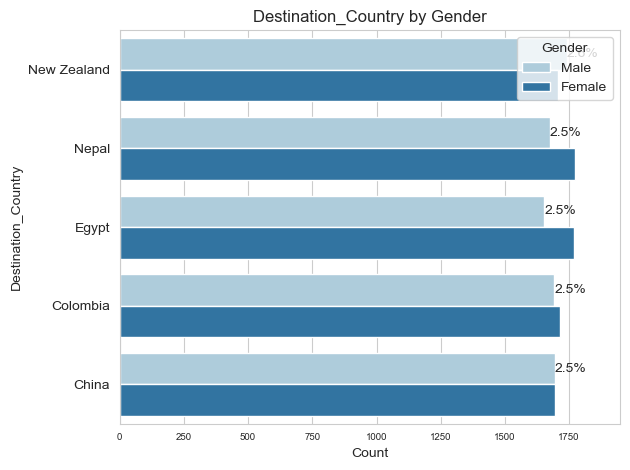

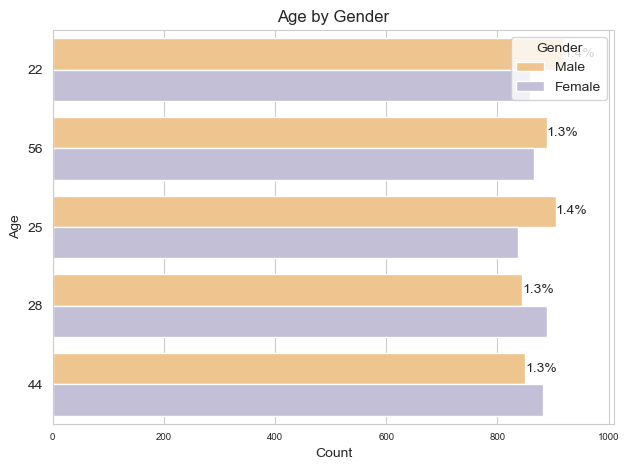

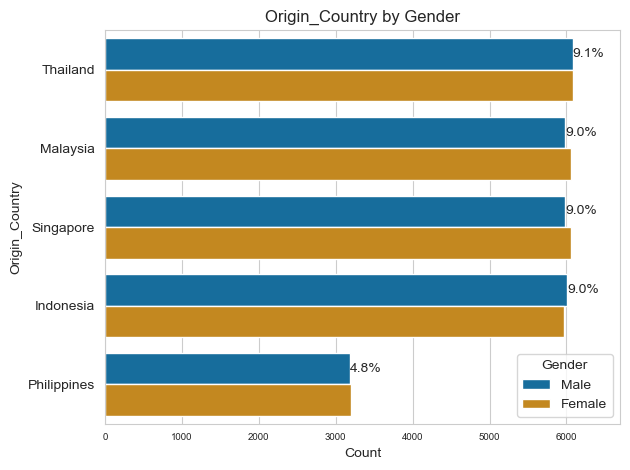

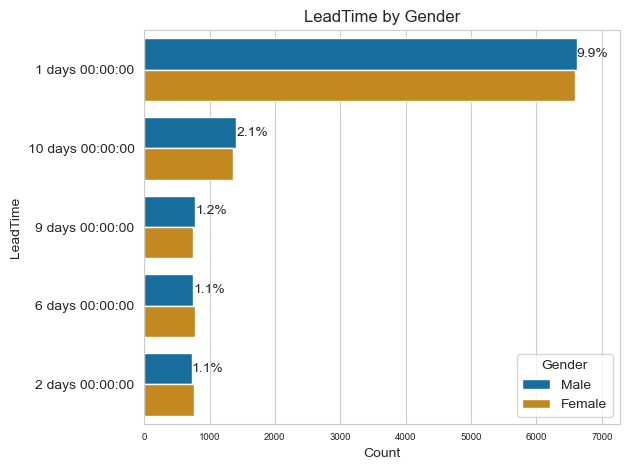

In [14]:
figsize = (20, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='No_of_Days', hue = 'Gender', data=data, palette='colorblind', order = data['No_of_Days'].value_counts().head().index)
total = data['No_of_Days'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='No_of_Days', title='No_of_Days by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()


figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='BookingYear', hue = 'Gender', data=data, palette='Set1', order = data['BookingYear'].value_counts().head().index)
total = data['BookingYear'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='BookingYear', title='BookingYear by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Booking_Price[SGD]', hue = 'Gender', data=data, palette='Set2', order = data['Booking_Price[SGD]'].value_counts().head().index)
total = data['Booking_Price[SGD]'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Booking_Price[SGD]', title='Booking_Price by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show

figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Payment_Mode', hue = 'Gender', data=data, palette='rainbow', order = data['Payment_Mode'].value_counts().head().index)
total = data['Payment_Mode'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Payment_Mode', title='Payment_Mode by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Hotel_Rating', hue = 'Gender', data=data, palette='Set3', order = data['Hotel_Rating'].value_counts().head().index)
total = data['Hotel_Rating'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Hotel_Rating', title='Hotel_Rating by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Hotel_Name', hue = 'Gender', data=data, palette='PuOr', order = data['Hotel_Name'].value_counts().head().index)
total = data['Hotel_Name'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Hotel_Name', title='Hotel_Name by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()


figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Destination_Country', hue = 'Gender', data=data, palette="Paired", order = data['Destination_Country'].value_counts().head().index)
total = data['Destination_Country'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Destination_Country', title='Destination_Country by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()


figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Age', hue = 'Gender', data=data, palette='PuOr', order = data['Age'].value_counts().head().index)
total = data['Age'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Age', title='Age by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()


figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='Origin_Country', hue = 'Gender', data=data, palette='colorblind', order = data['Origin_Country'].value_counts().head().index)
total = data['Origin_Country'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='Origin_Country', title='Origin_Country by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()


figsize = (18, 20)
sns.set_style('whitegrid')
ax = sns.countplot(y='LeadTime', hue = 'Gender', data=data, palette='colorblind', order = data['LeadTime'].value_counts().head().index)
total = data['LeadTime'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
ax.margins(x=0.1)
ax.set(xlabel='Count', ylabel='LeadTime', title='LeadTime by Gender')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

<Figure size 1300x1700 with 0 Axes>

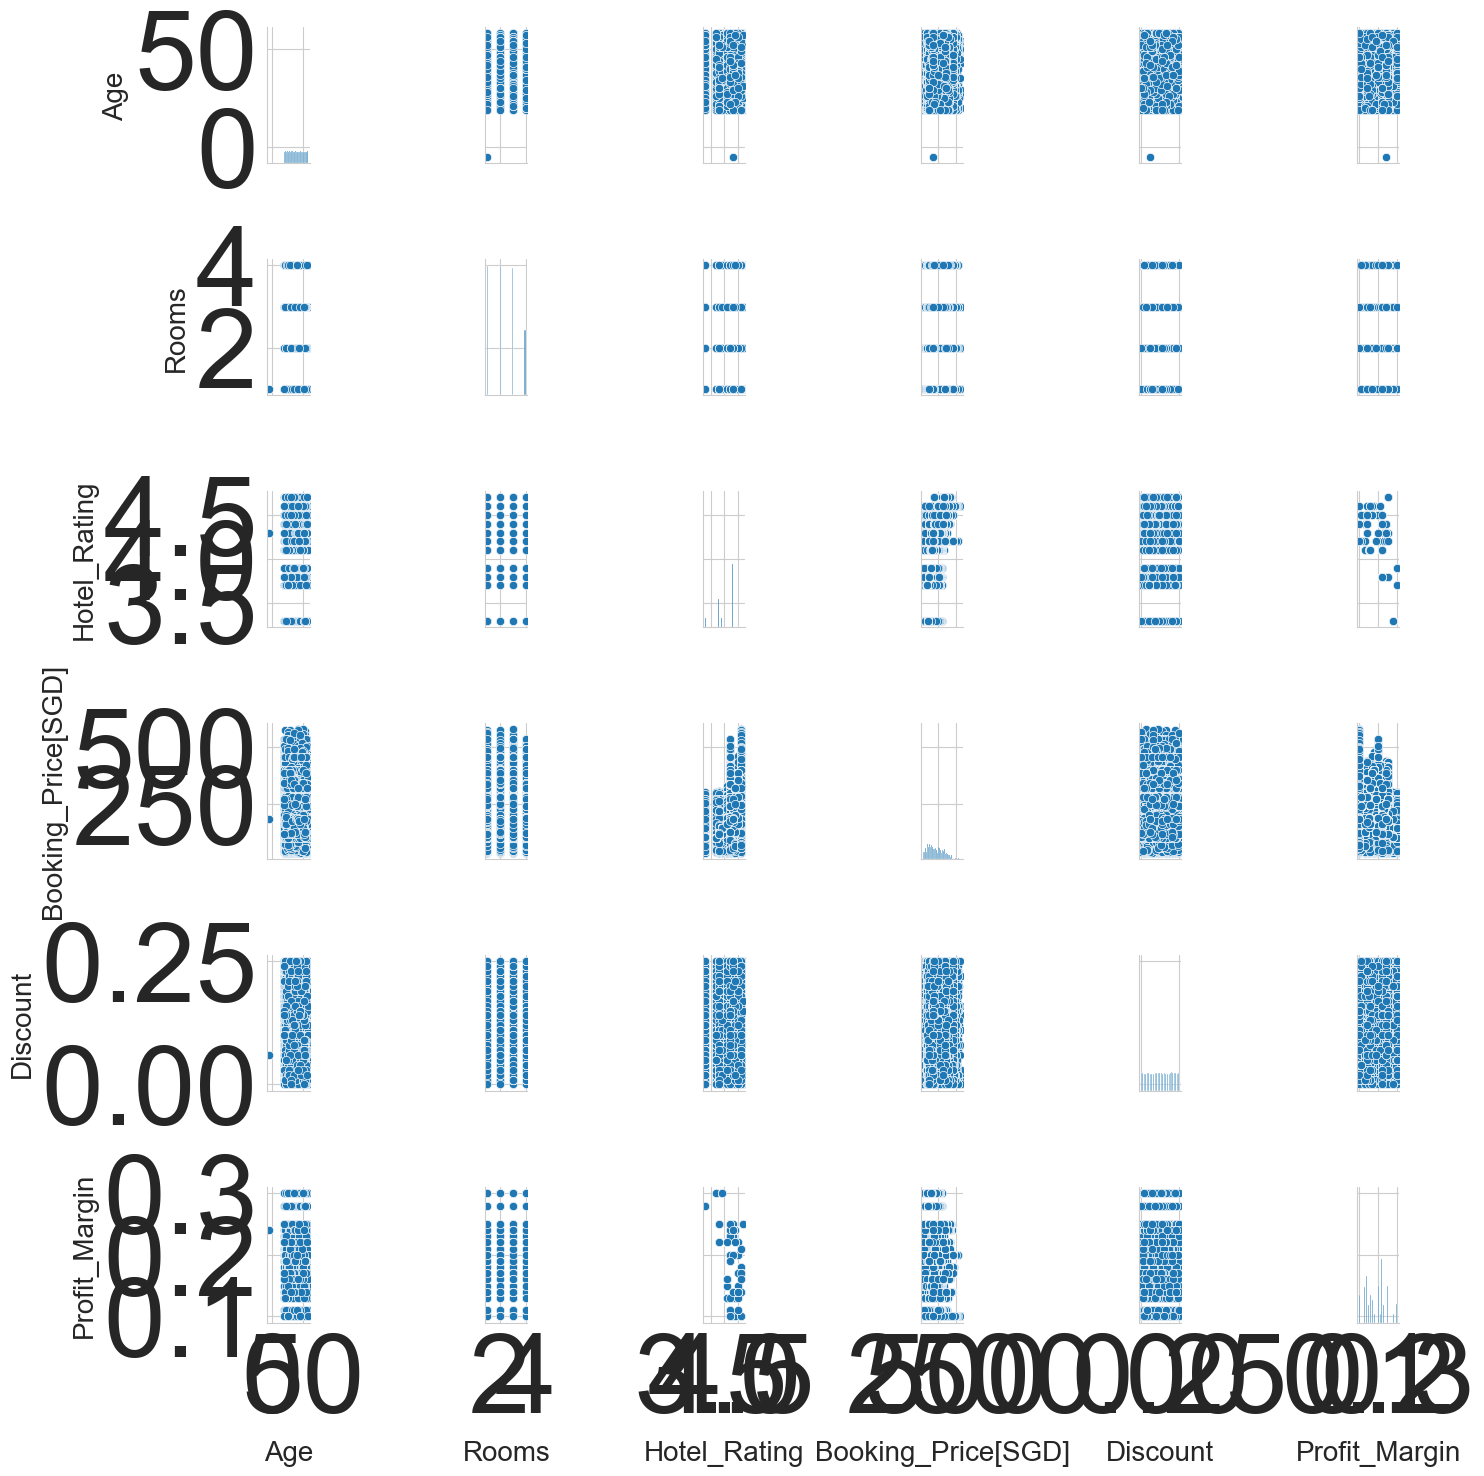

In [19]:
plt.figure(figsize=(13,17))
sns.pairplot(data)
plt.show()

# BiVariate Using BarPlot
Bar Plot - A bar plot can be used to show the relationship between Categorical variables and continuous variables

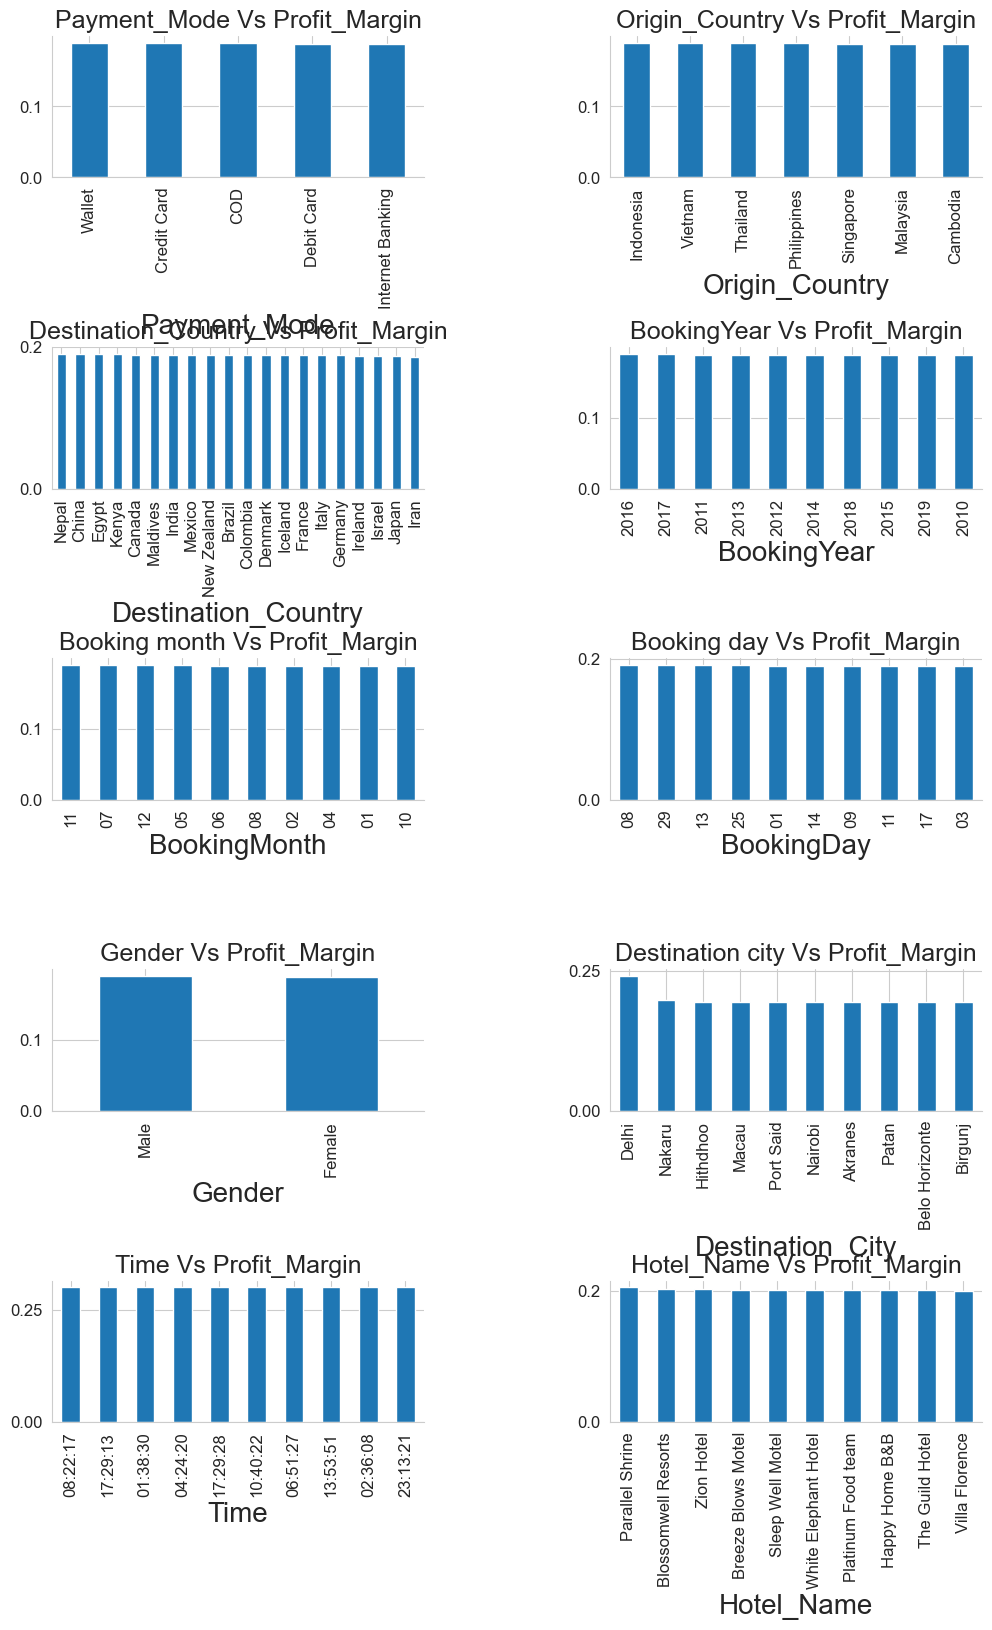

In [17]:
fig, axarr = plt.subplots(5, 2, figsize=(12, 18))
data.groupby('Payment_Mode')['Profit_Margin'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Payment_Mode Vs Profit_Margin", fontsize=18)

data.groupby('Origin_Country')['Profit_Margin'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Origin_Country Vs Profit_Margin", fontsize=18)

data.groupby('Destination_Country')['Profit_Margin'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Destination_Country Vs Profit_Margin", fontsize=18)

data.groupby('BookingYear')['Profit_Margin'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("BookingYear Vs Profit_Margin", fontsize=18)

data.groupby('BookingMonth')['Profit_Margin'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Booking month Vs Profit_Margin", fontsize=18)

data.groupby('BookingDay')['Profit_Margin'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Booking day Vs Profit_Margin", fontsize=18)

data.groupby('Gender')['Profit_Margin'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Gender Vs Profit_Margin", fontsize=18)

data.groupby('Destination_City')['Profit_Margin'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Destination city Vs Profit_Margin", fontsize=18)

data.groupby('Time')['Profit_Margin'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[4][0], fontsize=12)
axarr[4][0].set_title("Time Vs Profit_Margin", fontsize=18)

data.groupby('Hotel_Name')['Profit_Margin'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[4][1], fontsize=12)
axarr[4][1].set_title("Hotel_Name Vs Profit_Margin", fontsize=18)

plt.subplots_adjust(hspace=1.2)
plt.subplots_adjust(wspace=.5)
sns.despine()

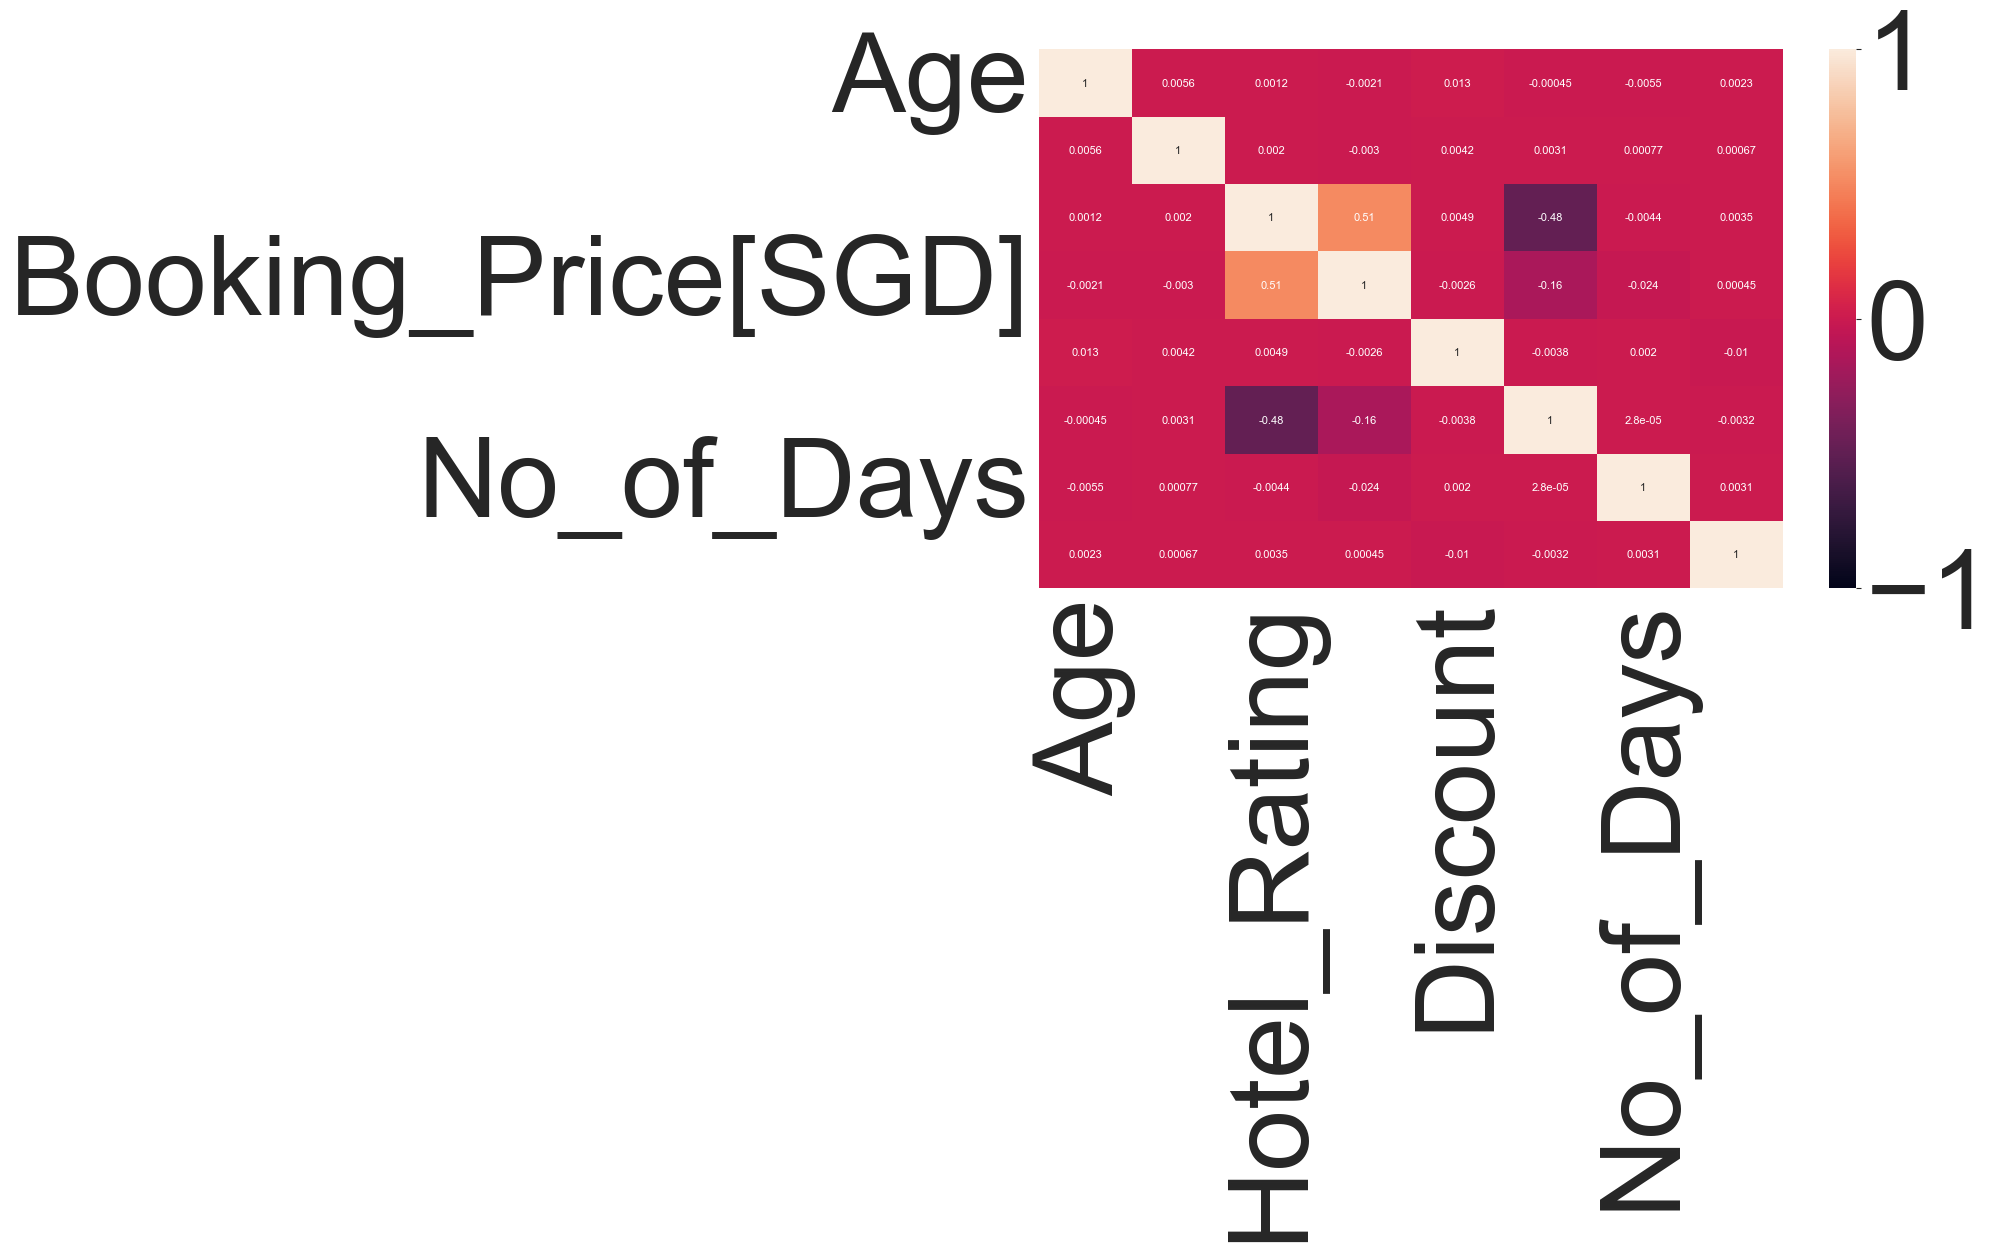

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Time', 'Gender', 'Origin_Country', 'Destination_Country',
       'Destination_City', 'Hotel_Name', 'Payment_Mode', 'BookingYear',
       'BookingMonth', 'BookingDay'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()